In [43]:
# Download dataset
!wget --no-check-certificate \
  https://drive.google.com/file/d/1FFUpt0oQS1TeUQNCTl3UxliIk4zwMNz-/view?usp=sharing \
  -O /tmp/TUBES AI.zip

--2023-01-14 07:26:15--  https://drive.google.com/file/d/1FFUpt0oQS1TeUQNCTl3UxliIk4zwMNz-/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 172.217.218.113, 172.217.218.100, 172.217.218.101, ...
Connecting to drive.google.com (drive.google.com)|172.217.218.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/tmp/TUBES’

/tmp/TUBES              [ <=>                ]  71.60K  --.-KB/s    in 0.01s   

2023-01-14 07:26:16 (6.79 MB/s) - ‘/tmp/TUBES’ saved [73318]

--2023-01-14 07:26:16--  http://ai.zip/
Resolving ai.zip (ai.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘ai.zip’
FINISHED --2023-01-14 07:26:16--
Total wall clock time: 0.4s
Downloaded: 1 files, 72K in 0.01s (6.79 MB/s)


In [44]:
# Ekstrak dataset

import os
import zipfile
from google.colab import drive

drive.mount('/content/drive/')

zip_ref = zipfile.ZipFile("/content/drive/My Drive/Colab Notebooks/Daun.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()
# local_zip = '/tmp/Daun.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp')
# zip_ref.close()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Definisikan path untuk data train dan data validation

base_dir = '/tmp/TUBES AI'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [45]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [46]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(val_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [47]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (518, 150, 150, 3)
Train Label =  (518,)
Validation Data =  (174, 150, 150, 3)
Validation Label =  (174,)


In [48]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [255 255 255]
Data setelah di-normalisasi  [1. 1. 1.]


In [49]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  []
Label setelah di-encoder  []


definisi model


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten

In [51]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [52]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [53]:
# Print model summary
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 19, 19, 64)      

In [54]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [55]:
H = model.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
26/26 [==============================] - 11s 407ms/step - loss: 0.8143 - acc: 0.7220 - val_loss: 0.3369 - val_acc: 0.9713
Epoch 2/15
26/26 [==============================] - 10s 399ms/step - loss: 0.1634 - acc: 0.9614 - val_loss: 0.0645 - val_acc: 0.9770
Epoch 3/15
26/26 [==============================] - 10s 387ms/step - loss: 0.0574 - acc: 0.9826 - val_loss: 0.0346 - val_acc: 0.9828
Epoch 4/15
26/26 [==============================] - 10s 386ms/step - loss: 0.0256 - acc: 0.9903 - val_loss: 0.0226 - val_acc: 0.9943
Epoch 5/15
26/26 [==============================] - 10s 389ms/step - loss: 0.0205 - acc: 0.9981 - val_loss: 0.0145 - val_acc: 0.9943
Epoch 6/15
26/26 [==============================] - 10s 387ms/step - loss: 0.0110 - acc: 0.9942 - val_loss: 0.0165 - val_acc: 0.9943
Epoch 7/15
26/26 [==============================] - 10s 386ms/step - loss: 0.0086 - acc: 0.9961 - val_loss: 0.0086 - val_acc: 0.9943
Epoch 8/15
26/26 [==============================] - 10s 388ms/step - 

evalusai model


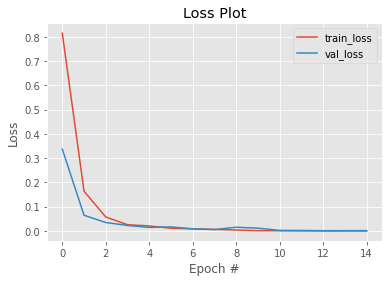

In [56]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

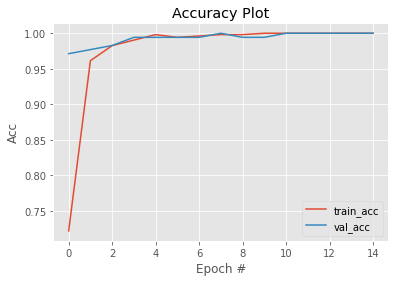

In [57]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

6/6 [==============================] - 2s 317ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00        87

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174



<ipython-input-58-740d17bcb613>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = (pred > 0.5).astype(np.int)
